Exploratory Data Analysis on a Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv('Cardiotocographic.csv')   # loading dataset into a dataframe
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


### 1. Data cleaning and preparation

In [5]:
df.shape

(2126, 14)

In [6]:
df.isnull().sum()  # missing values identified

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [7]:
df.dropna(inplace=True)    # handling missing values
df.isnull().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

In [8]:
df.duplicated().sum()  # handling duplicate values

2

In [9]:
df.drop_duplicates(inplace=True,ignore_index=True)
df.duplicated().sum()

0

<Axes: >

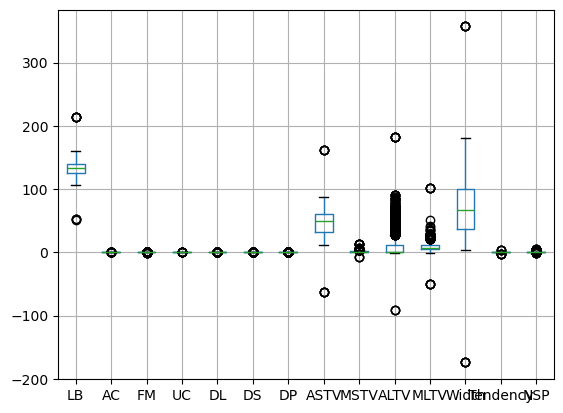

In [10]:
df.boxplot()   # outliers identified

In [11]:
def outliers_capping(df,column):    # outliers capping using IQR method
    Q1= df[column].quantile(0.25)
    Q3= df[column].quantile(0.75)
    IQR= Q3-Q1
    lower_bound= Q1-(1.5*IQR)
    upper_bound= Q3+(1.5*IQR)
    df[column]= df[column].apply(lambda x: lower_bound if x<lower_bound else upper_bound if x>upper_bound else x)

In [12]:
for i in df.select_dtypes(include=['float','int']).columns:
    outliers_capping(df,i)

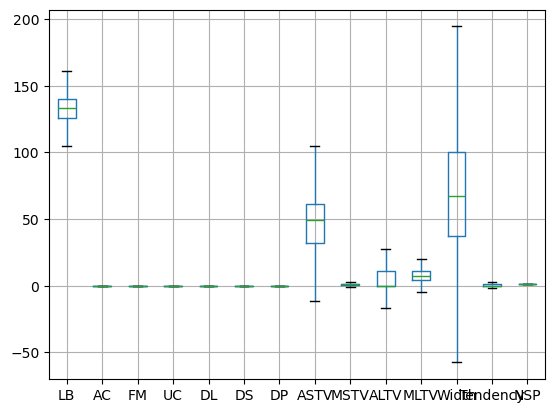

In [13]:
df.boxplot()     # outliers removed
plt.show()

### 2. Statistical Summary

In [15]:
df.shape

(2103, 14)

In [16]:
# calculating mean,median,standard deviation and IQR for each columns
from tabulate import tabulate

In [17]:
summary= pd.DataFrame({'Mean': df.mean(),'Median':df.median(),'Std Dev':df.std(),'IQR':(df.quantile(0.75)-df.quantile(0.25))})

In [18]:
print(tabulate(summary,headers='keys',tablefmt='double_grid'))

╔══════════╦══════════════╦══════════════╦═════════════╦═════════════╗
║          ║         Mean ║       Median ║     Std Dev ║         IQR ║
╠══════════╬══════════════╬══════════════╬═════════════╬═════════════╣
║ LB       ║ 133.292      ║ 133          ║  9.97621    ║ 14          ║
╠══════════╬══════════════╬══════════════╬═════════════╬═════════════╣
║ AC       ║   0.00314374 ║   0.00163132 ║  0.00384408 ║  0.00564972 ║
╠══════════╬══════════════╬══════════════╬═════════════╬═════════════╣
║ FM       ║   0.00156454 ║   0          ║  0.00247728 ║  0.00255919 ║
╠══════════╬══════════════╬══════════════╬═════════════╬═════════════╣
║ UC       ║   0.00436146 ║   0.00448431 ║  0.00300815 ║  0.00470497 ║
╠══════════╬══════════════╬══════════════╬═════════════╬═════════════╣
║ DL       ║   0.00176999 ║   0          ║  0.00267455 ║  0.0032949  ║
╠══════════╬══════════════╬══════════════╬═════════════╬═════════════╣
║ DS       ║   0          ║   0          ║  0          ║  0          ║
╠═════

### 3. Data Visualization

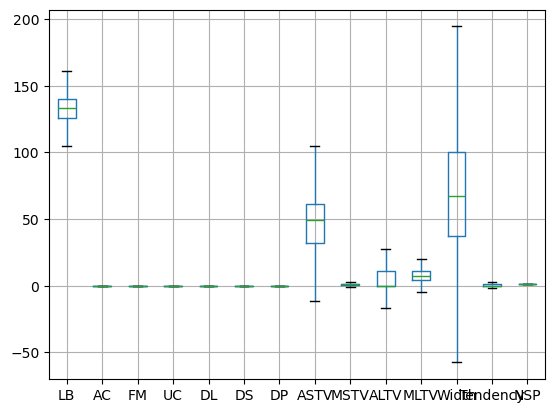

In [20]:
df.boxplot()  # Boxplot
plt.show()

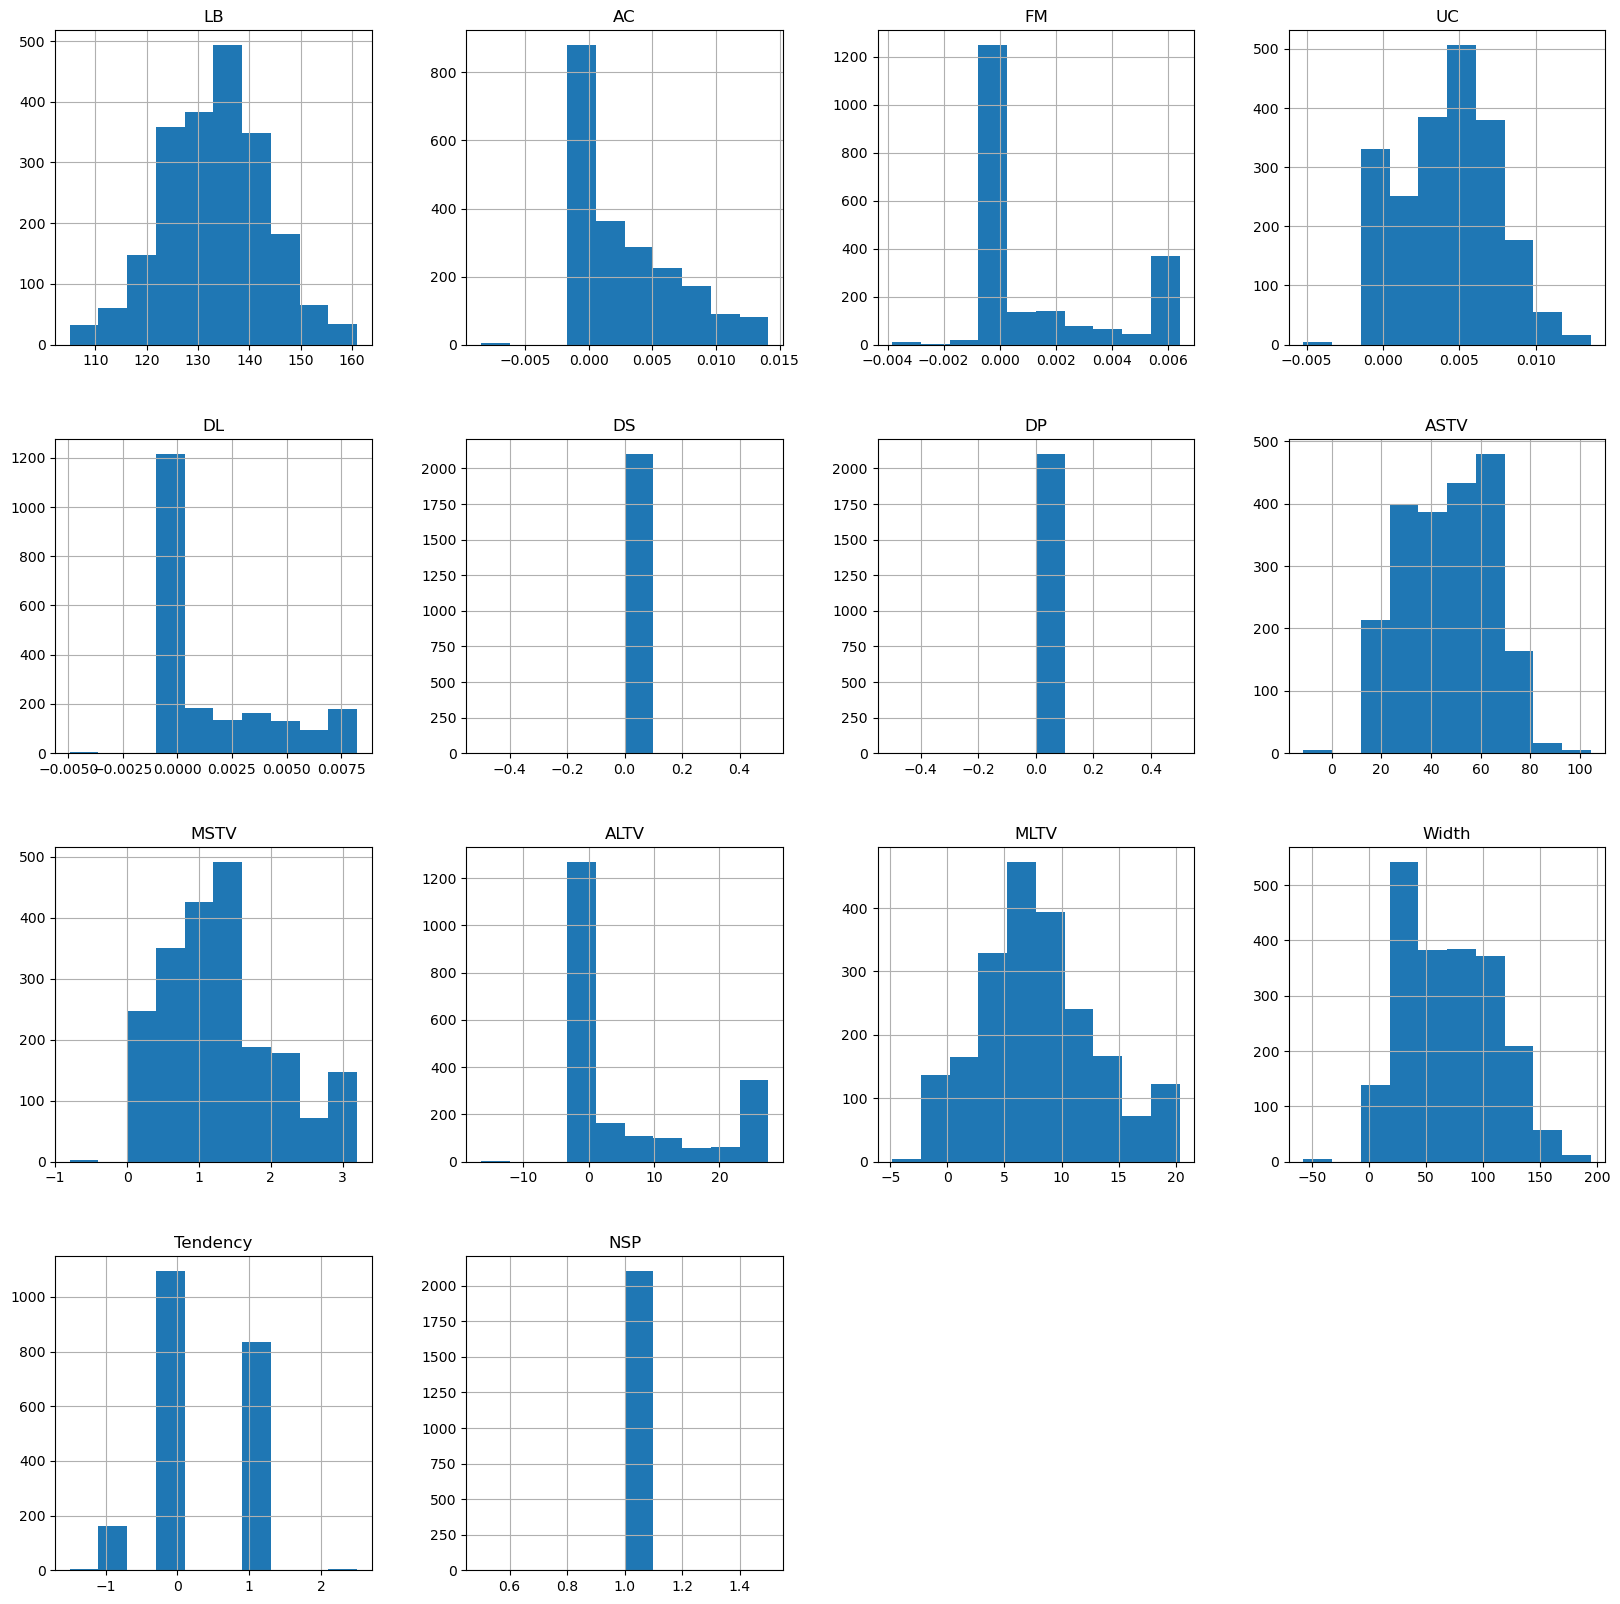

In [21]:
df.hist(bins=10,figsize=(20,20))  # Histogram
plt.show()

In [22]:
df_cat= df.select_dtypes(include=['object','category']).columns   #categorical columns in dataset

In [23]:
if len(df_cat)==0:  #visualize barchart and pie charts if there are categorical columns in dataset
    print('No categorical columns found in dataset')
else:
    for col in df_cat:
        freq= df[column].value_counts()
        sns.barplot(df_cat)   # Bar chart
        plt.show()
        plt.pie(df_cat)      # Pie chart
        plt.show()

No categorical columns found in dataset


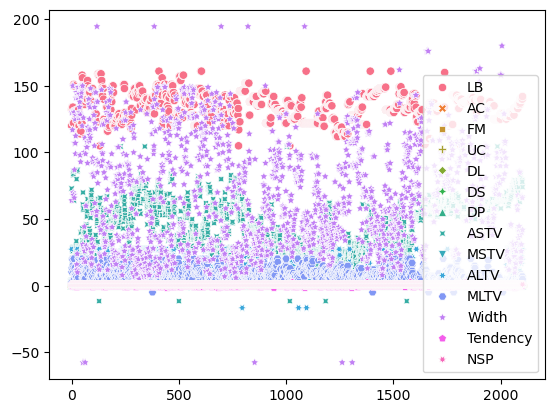

In [24]:
sns.scatterplot(df)  # scatterplot
plt.show()

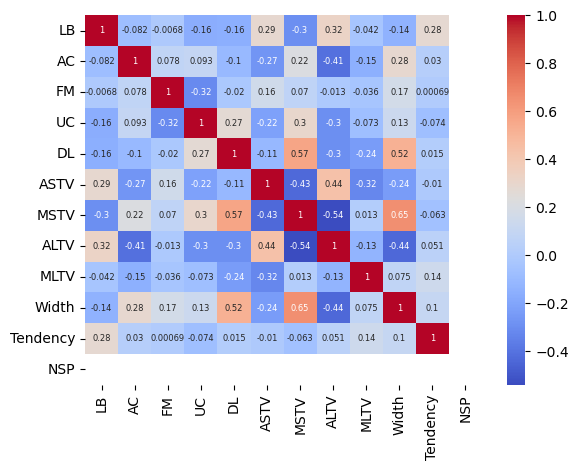

In [25]:
corr=df.loc[:, (df != 0).any(axis=0)].corr()  # correlation
sns.heatmap(corr,annot=True,annot_kws={"size":6},cmap='coolwarm') # correlation heatmap
plt.show()

In [ ]:
sns.pairplot(df) #pairplot
plt.show()

In [ ]:
sns.violinplot(df)  # violinplot
plt.show()

### 4. Correlation Analysis

Pearson correlation coefficient lies between -1 to 1.  
Correlation heatmap used to show the correlation coefficient between each variables.  
If there are any features whose correlation is  more than correlation with target, then it is multicolinerity. 
Since,here we don't have any target column,we need not to remove any feature column.

### 5. Conclusion

EDA is a preprocessing step before implementing the data in machine learning algorithm.  
Once dataset loaded, rectifying and removing missing values is performed.  
Identified duplicates and removed. Outliers capping is done with IQR method.  
In statistical analysis, each column's mean,median,standard deviation and IQR is calculated and presented in tabular format.  
Visualized data in histogram,correlation heatmap,pairplot,violin plot as specified.  
Bar chart and Pie charts of categorical columns are not implemented since there are no categorical columns in dataset as specified.  
